<a href="https://colab.research.google.com/github/a5hi-k/ML_Projects/blob/main/classification_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREAST CANCER CLASSIFICATION**
# **USING KNN,NAIVE BAYES,SVM AND LOGISTIC REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading
data=pd.read_csv('/content/breast_cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Checking for missing values

data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data visualization

<ipython-input-59-64b39e599a83>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

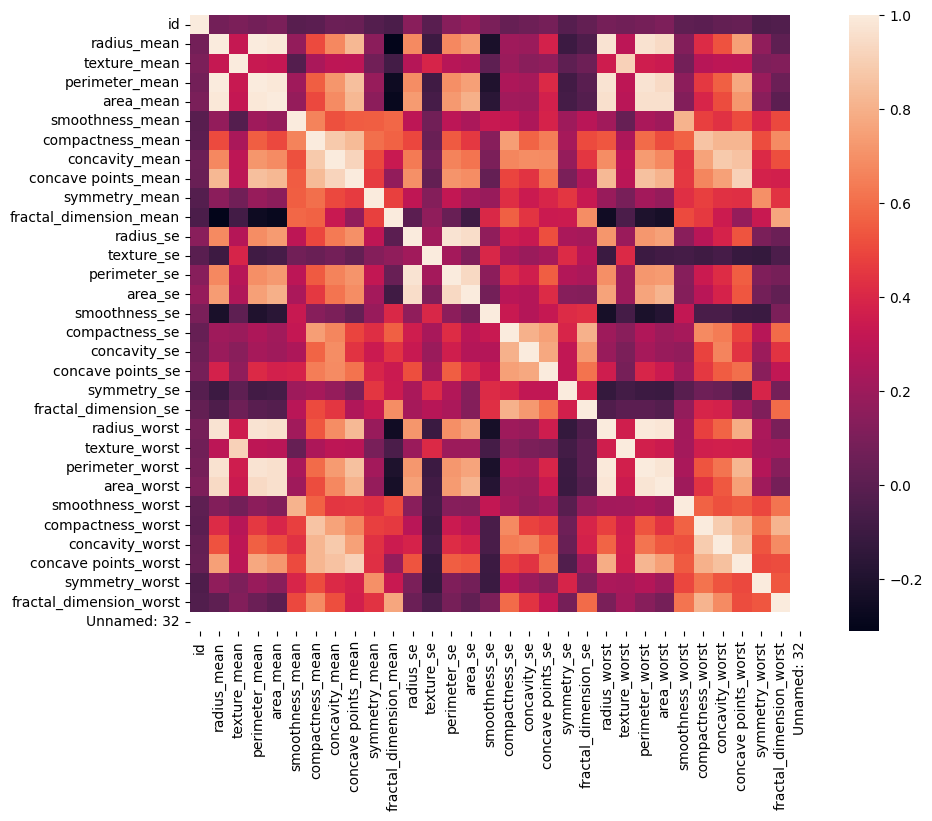

In [ ]:
# correlation between each features

plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

In [ ]:
# Dropping unnecessarry features

data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

# Dropping duplicates if there is any

data.drop_duplicates()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


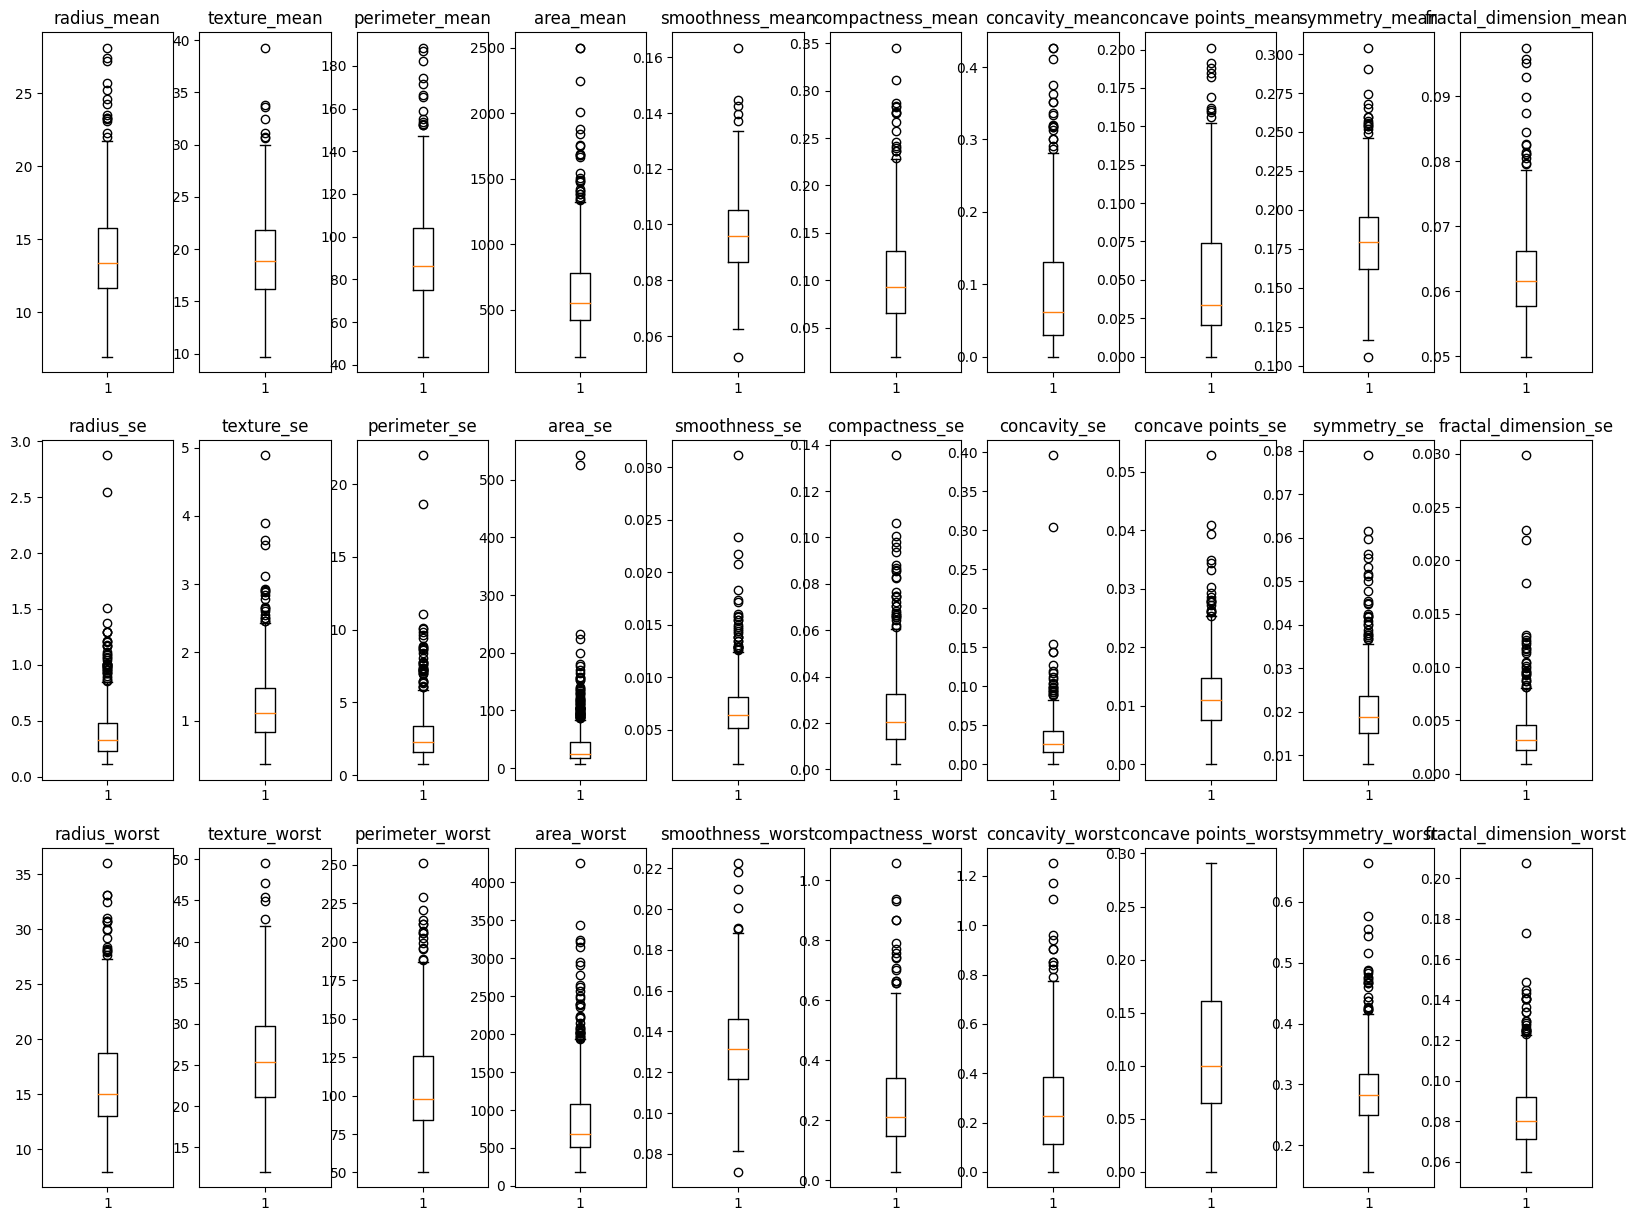

In [ ]:
# Plotting box plot to look for outliers

plt.figure(figsize=(20,15))
k=1
for i in data.columns:
  if i!='diagnosis':

    plt.subplot(3,10,k)
    plt.boxplot(data[i].values)
    plt.title(i)
    k+=1
plt.show()

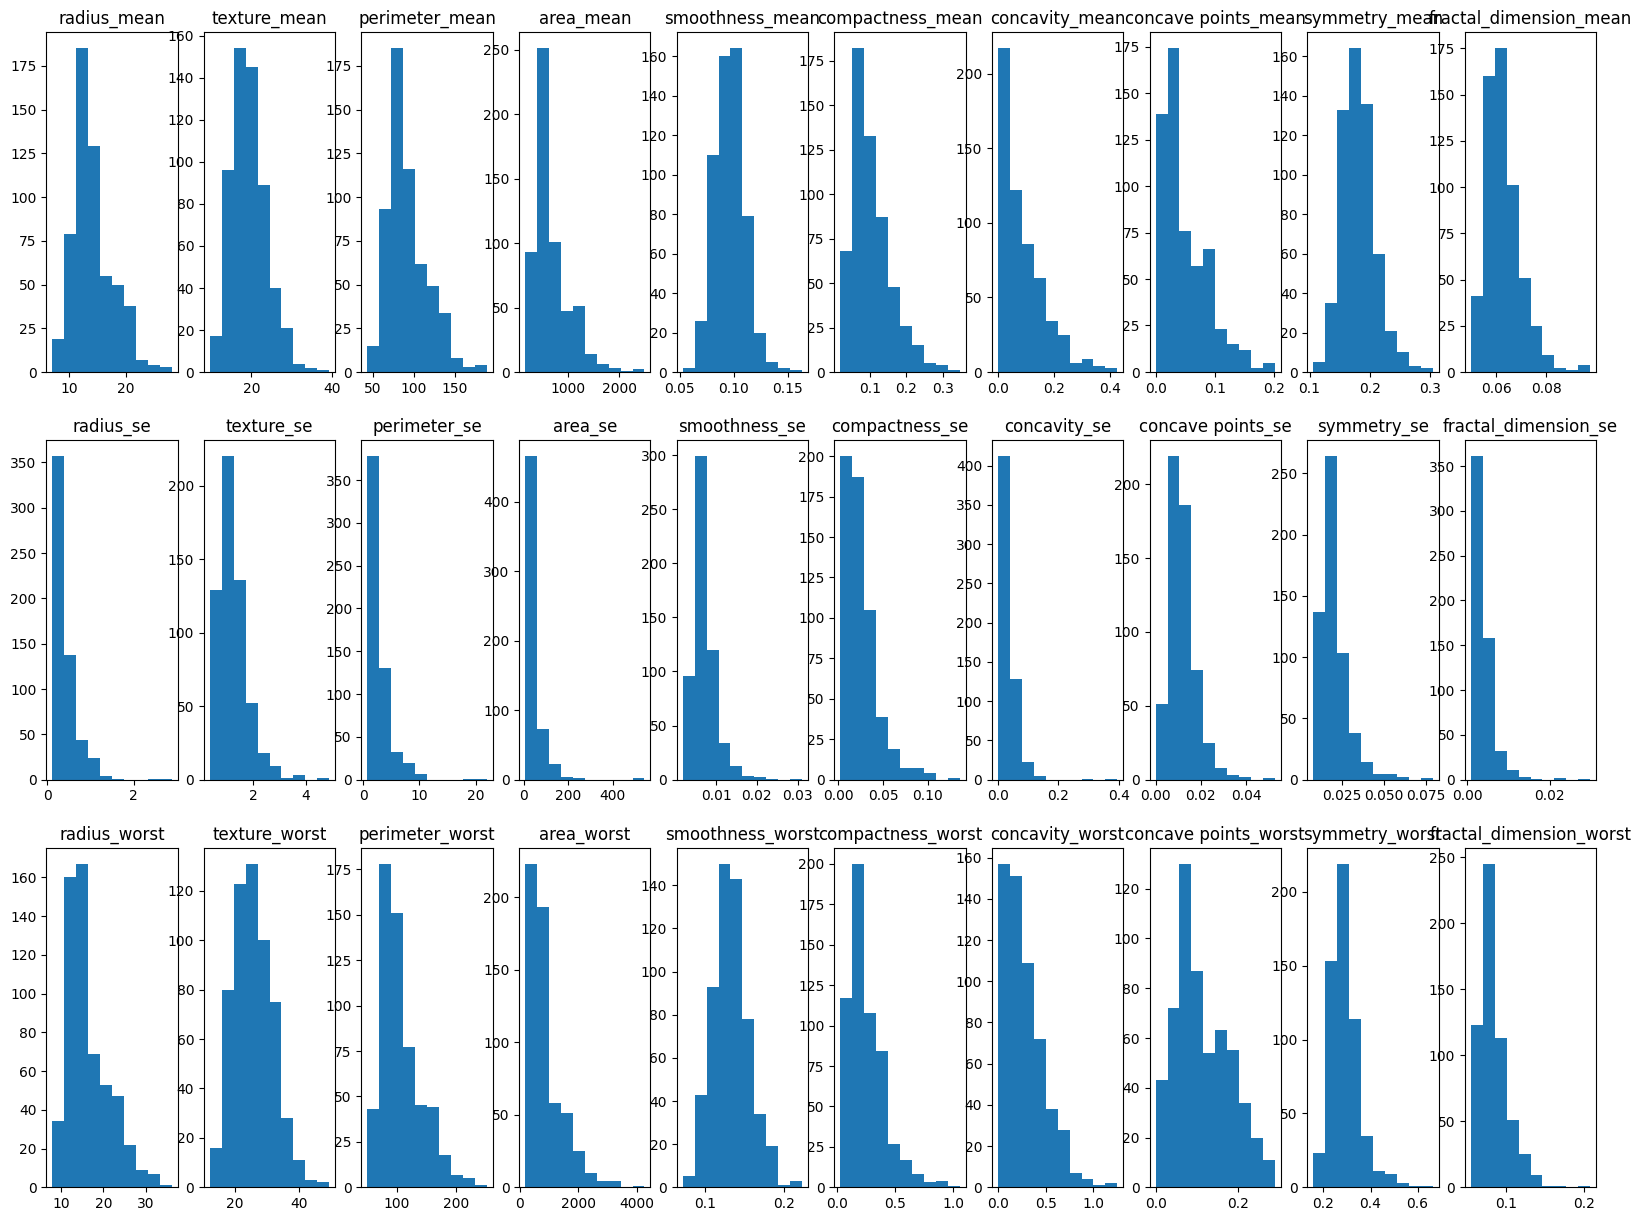

In [ ]:

# Plotting histogram to see frequency distribution of features

plt.figure(figsize=(20,15))
k=1
for i in data.columns:
  if i!='diagnosis':

    plt.subplot(3,10,k)
    plt.hist(data[i].values)
    plt.title(i)
    k+=1
plt.show()



# Data Preprocessing

In [ ]:
# Removing Extreme outliers

for i in data.columns:
  if i != 'diagnosis':
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR *1.5)
    upper = q3 + (1.5*IQR *1.5)

    new_data = data[(data[i] >= lower) & (data[i] <= upper)]

new_data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Splitting features and labels

x=new_data.iloc[:,1:].values
y=new_data.iloc[:,0].values
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B'

# Train-Test split and Feature Scaling

In [ ]:
# Splitting the data into train test splits

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

print(x_train[:3])
print(x_test[:3])
print(y_train[:3])
print(y_test[:3])

[[1.116e+01 2.141e+01 7.095e+01 3.803e+02 1.018e-01 5.978e-02 8.955e-03
  1.076e-02 1.615e-01 6.144e-02 2.865e-01 1.678e+00 1.968e+00 1.899e+01
  6.908e-03 9.442e-03 6.972e-03 6.159e-03 2.694e-02 2.060e-03 1.236e+01
  2.892e+01 7.926e+01 4.580e+02 1.282e-01 1.108e-01 3.582e-02 4.306e-02
  2.976e-01 7.123e-02]
 [1.396e+01 1.705e+01 9.143e+01 6.024e+02 1.096e-01 1.279e-01 9.789e-02
  5.246e-02 1.908e-01 6.130e-02 4.250e-01 8.098e-01 2.563e+00 3.574e+01
  6.351e-03 2.679e-02 3.119e-02 1.342e-02 2.062e-02 2.695e-03 1.639e+01
  2.207e+01 1.081e+02 8.260e+02 1.512e-01 3.262e-01 3.209e-01 1.374e-01
  3.068e-01 7.957e-02]
 [1.387e+01 2.070e+01 8.977e+01 5.848e+02 9.578e-02 1.018e-01 3.688e-02
  2.369e-02 1.620e-01 6.688e-02 2.720e-01 1.047e+00 2.076e+00 2.312e+01
  6.298e-03 2.172e-02 2.615e-02 9.061e-03 1.490e-02 3.599e-03 1.505e+01
  2.475e+01 9.917e+01 6.886e+02 1.264e-01 2.037e-01 1.377e-01 6.845e-02
  2.249e-01 8.492e-02]]
[[2.742e+01 2.627e+01 1.869e+02 2.501e+03 1.084e-01 1.988e-01 3.63

In [ ]:
# Scaling

from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

print(x_train)
print(x_test)


[[-0.8930008   0.4690238  -0.91781359 ... -1.11839353  0.18563721
  -0.77032194]
 [-0.07963514 -0.51805671 -0.0524795  ...  0.35757622  0.35136698
  -0.21983315]
 [-0.10577903  0.30828362 -0.12261889 ... -0.72116147 -1.12398833
   0.13329814]
 ...
 [ 1.32923038  0.1452795   1.19270583 ...  0.23241448 -0.55113975
  -1.68516301]
 [-1.06438856 -0.23053555 -1.092317   ... -1.44443984 -0.31335354
  -1.02576458]
 [-0.54441551 -0.18072874 -0.57725731 ... -0.47130736  0.19824708
  -0.72939831]]
[[ 3.83032977  1.56930161  3.98138014 ...  2.31479283 -0.41783536
  -0.56966416]
 [-0.8029496  -0.74897921 -0.83035063 ... -0.76762777 -0.03953913
   0.31217399]
 [-0.82037886 -1.00027723 -0.80880178 ... -0.80705371 -1.9130062
  -0.56966416]
 ...
 [ 1.10264994 -0.56333563  1.04904685 ...  0.60946421 -0.05575182
  -0.04293748]
 [ 1.07941092  0.15207134  0.90961313 ...  0.06188162  3.61912589
  -1.43830113]
 [-0.70708864 -0.62446218 -0.57810236 ...  1.12575636  5.22598419
   1.3266839 ]]


# Training the models and Performance evaluation

KNeighborsClassifier(n_neighbors=7)
Accuracy score for KNeighborsClassifier(n_neighbors=7) is : 0.9642857142857143
              precision    recall  f1-score   support

           B       0.97      0.98      0.97       113
           M       0.96      0.93      0.94        55

    accuracy                           0.96       168
   macro avg       0.96      0.95      0.96       168
weighted avg       0.96      0.96      0.96       168

-----------------------------------------------------------------------------------------------------
GaussianNB()
Accuracy score for GaussianNB() is : 0.9642857142857143
              precision    recall  f1-score   support

           B       0.96      0.99      0.97       113
           M       0.98      0.91      0.94        55

    accuracy                           0.96       168
   macro avg       0.97      0.95      0.96       168
weighted avg       0.96      0.96      0.96       168

------------------------------------------------------------

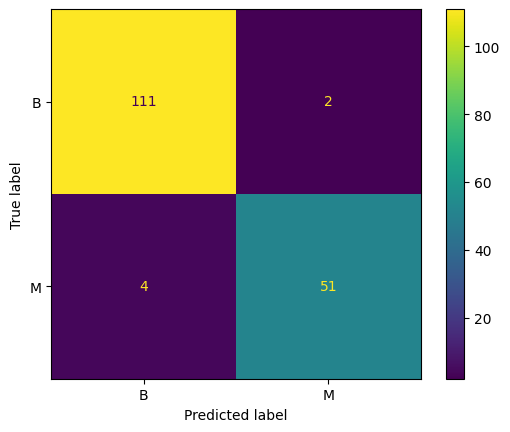

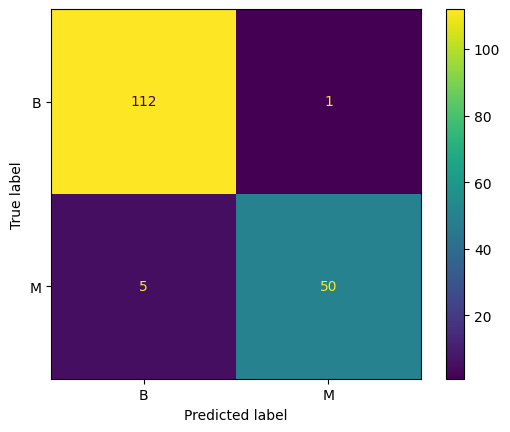

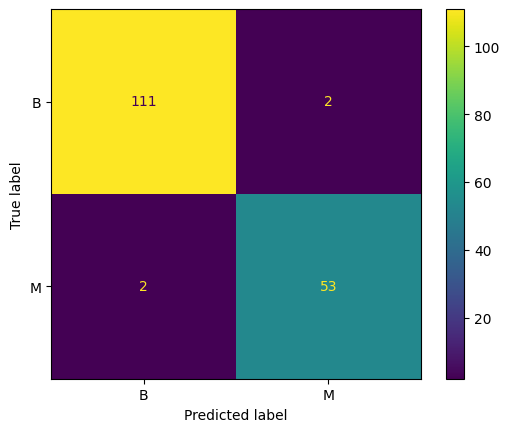

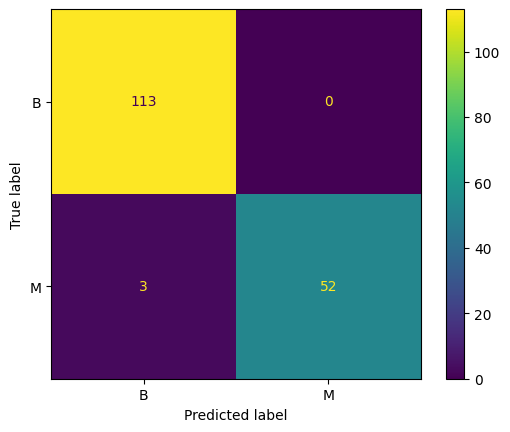

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

knn_m = KNeighborsClassifier(n_neighbors=7)
gaussian_m = GaussianNB()
svm_m = SVC()
regressor_m = LogisticRegression()

lst=[knn_m,gaussian_m,svm_m,regressor_m]
labels=['B','M']

for model in lst:

  model.fit(x_train,y_train)
  print(model)

  y_pred=model.predict(x_test)
  print(f'Accuracy score for {model} is : {accuracy_score(y_test,y_pred)}')
  print(classification_report(y_test,y_pred))

  met=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
  met.plot()
  print('-----------------------------------------------------------------------------------------------------')


# Value prediction

In [ ]:
values=[[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,
         25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]]

trans_values=scalar.transform(values)

for model in lst:
  print(f'Prediction using {model} : {model.predict(trans_values)}')

Prediction using KNeighborsClassifier(n_neighbors=7) : ['M']
Prediction using GaussianNB() : ['M']
Prediction using SVC() : ['M']
Prediction using LogisticRegression() : ['M']
